In [2]:
# Importing libraries and packages
import os
import cv2 
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline



In [2]:
CUDA_VISIBLE_DEVICES = 1

In [3]:
images = []
label = []

img_path = r'C:\Users\melte\Desktop\Cluster_Data\Men'
# img_path = r'C:\Users\melte\Desktop\Cluster_Data\Frauen'
listImgs = os.listdir(img_path)
i = 0

# LOAD IN THE IMAGES
for k in range(0,len(listImgs)):
    img = cv2.imread(('\\'.join([img_path,listImgs[k]])).format(img_path),-1)
    RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(RGB)
    i = i+1
    pass 


In [4]:
import face_recognition

#creating 1x128d feature embeddings from dlibs face_recognition library for train, test and val 
embedding = []


for n in range(len(images)):
    embedding.append(face_recognition.api.face_encodings(images[n], known_face_locations=None, num_jitters=10)) 
embedding = np.array(embedding)


# #Flatten the embeddings to vectors: 
embedding = np.reshape(embedding, (i, 1*128))


## k-means / HAC

In [25]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering

# K-Means Clustering:
predict = KMeans(n_clusters=10, random_state=0).fit_predict(embedding)


# # HAC:
# #linkage : {“ward”, “complete”, “average”, “single”}
# predict = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
#             connectivity=None, linkage='ward', memory=None, n_clusters=10,
#             pooling_func='deprecated').fit_predict(embedding)

# print(predict)

[4 7 2 7 1 0 0 0 4 0 0 1 4 9 0 4 2 3 4 8 2 7 2 6 9 4 5 7 4 4 0 7 0 0 4 7 4
 6 1 5 7 0 3 4 0 0 0 5 6 3 8 4 8 2 1 3 6 6 1 6 5 6 2 5 0 6 0 6 1 5 8 5 1 0
 2 5 4 5 3 0 1 5 6 8 2 4 8 9 2 0 1 0 1 1 0 7 2 1 3 8 5 9 1 0 7 1 5 3 9 1 9
 5 5 2 5 0 2 7 2 9 5 4 5 1 2 8 9 3 2 0 0 7 0 0 0 3 2 7 2 2 8 2 9 3 1 8 5 8
 8 0 4 3 3 9 0 5 2 9 1 2 0 6 4 3 6 0 7 3 1 4 3 4 1 7 9 6 2 3 7 7 5 1 0 3 8
 3 0 0 6 7 3 3 2 3 6 4 7 3 5 6]


In [26]:
#Let's generate the 10 Clusters and store the corresponding image labels in them

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []

members0 = []
members1 = []
members2 = []
members3 = []
members4 = []
members5 = []
members6 = []
members7 = []
members8 = []
members9 = []


for i in range (200): 
    if (predict[i] == 0): 
        cluster0.append(images[i])
        members0.append(listImgs[i])
        
    elif (predict[i] == 1): 
        cluster1.append(images[i])
        members1.append(listImgs[i])
        
    elif (predict[i] == 2): 
        cluster2.append(images[i])
        members2.append(listImgs[i])
        
    elif (predict[i] == 3): 
        cluster3.append(images[i])
        members3.append(listImgs[i])
        
    elif (predict[i] == 4): 
        cluster4.append(images[i])
        members4.append(listImgs[i])
        
    elif (predict[i] == 5): 
        cluster5.append(images[i])
        members5.append(listImgs[i])
        
    elif (predict[i] == 6): 
        cluster6.append(images[i])
        members6.append(listImgs[i])
        
    elif (predict[i] == 7): 
        cluster7.append(images[i])
        members7.append(listImgs[i])
        
    elif (predict[i] == 8): 
        cluster8.append(images[i])
        members8.append(listImgs[i])
        
    elif (predict[i] == 9): 
        cluster9.append(images[i])
        members9.append(listImgs[i])

        pass
    pass 

n_cluster0 = len(cluster0)
n_cluster1 = len(cluster1)
n_cluster2 = len(cluster2)
n_cluster3 = len(cluster3)
n_cluster4 = len(cluster4)
n_cluster5 = len(cluster5)
n_cluster6 = len(cluster6)
n_cluster7 = len(cluster7)
n_cluster8 = len(cluster8)
n_cluster9 = len(cluster9)

In [27]:
#prints cluster overview

print("Number of elements in Cluster 0: ", n_cluster0, "\nElement names: ", members0, 
     "\n\nNumber of elements in Cluster 1: ", n_cluster1, "\nElement names: ", members1, 
     "\n\nNumber of elements in Cluster 2: ", n_cluster2, "\nElement names: ", members2, 
     "\n\nNumber of elements in Cluster 3: ", n_cluster3, "\nElement names: ", members3, 
     "\n\nNumber of elements in Cluster 4: ", n_cluster4, "\nElement names: ", members4, 
     "\n\nNumber of elements in Cluster 5: ", n_cluster5, "\nElement names: ", members5, 
     "\n\nNumber of elements in Cluster 6: ", n_cluster6, "\nElement names: ", members6, 
     "\n\nNumber of elements in Cluster 7: ", n_cluster7, "\nElement names: ", members7, 
     "\n\nNumber of elements in Cluster 8: ", n_cluster8, "\nElement names: ", members8, 
     "\n\nNumber of elements in Cluster 9: ", n_cluster9, "\nElement names: ", members9, )

Number of elements in Cluster 0:  34 
Element names:  ['mCM (14).jpg', 'mCM (15).jpg', 'mCM (16).jpg', 'mCM (18).jpg', 'mCM (19).jpg', 'mCM (4).jpg', 'mCW (19).jpg', 'mCW (20).jpg', 'mCW (3).jpg', 'mFM (10).jpg', 'mFM (13).jpg', 'mFM (14).jpg', 'mFM (15).jpg', 'mFW (13).jpg', 'mFW (15).jpg', 'mFW (3).jpg', 'mFW (9).jpg', 'mMM (18).jpg', 'mMM (2).jpg', 'mMM (4).jpg', 'mMW (12).jpg', 'mMW (5).jpg', 'mPM (18).jpg', 'mPM (19).jpg', 'mPM (20).jpg', 'mPM (3).jpg', 'mPM (4).jpg', 'mPW (18).jpg', 'mPW (4).jpg', 'mSM (1).jpg', 'mSM (14).jpg', 'mSW (11).jpg', 'mSW (15).jpg', 'mSW (16).jpg'] 

Number of elements in Cluster 1:  21 
Element names:  ['mCM (13).jpg', 'mCM (2).jpg', 'mCW (8).jpg', 'mFM (4).jpg', 'mFM (8).jpg', 'mFW (17).jpg', 'mFW (20).jpg', 'mMM (1).jpg', 'mMM (19).jpg', 'mMM (20).jpg', 'mMM (3).jpg', 'mMM (7).jpg', 'mMW (11).jpg', 'mMW (14).jpg', 'mMW (18).jpg', 'mPM (12).jpg', 'mPW (13).jpg', 'mPW (8).jpg', 'mSM (17).jpg', 'mSM (20).jpg', 'mSW (10).jpg'] 

Number of elements in Clu

In [28]:
#define a get value class for simple export to Excel or SPSS

def getvalues(members):

    mCW, mCM, mMW, mMM, mFW, mFM, mPW, mPM, mSW, mSM = 0,0,0,0,0,0,0,0,0,0

    for i in members:
        if "mCW" in i: 
            mCW += 1

        elif "mCM" in i: 
            mCM += 1

        elif "mMW" in i: 
            mMW += 1

        elif "mMM" in i: 
            mMM += 1

        elif "mFW" in i: 
            mFW += 1

        elif "mFM" in i: 
            mFM += 1

        elif "mPW" in i: 
            mPW += 1

        elif "mPM" in i: 
            mPM += 1

        elif "mSW" in i: 
            mSW += 1

        elif "mSM" in i: 
            mSM += 1

            pass
        pass

    return(mCW, mCM, mMW, mMM, mFW, mFM, mPW, mPM, mSW, mSM)

#     fCW, fCM, fMW, fMM, fFW, fFM, fPW, fPM, fSW, fSM = 0,0,0,0,0,0,0,0,0,0

#     for i in members:
#         if "fCW" in i: 
#             fCW += 1

#         elif "fCM" in i: 
#             fCM += 1

#         elif "fMW" in i: 
#             fMW += 1

#         elif "fMM" in i: 
#             fMM += 1

#         elif "fFW" in i: 
#             fFW += 1

#         elif "fFM" in i: 
#             fFM += 1

#         elif "fPW" in i: 
#             fPW += 1

#         elif "fPM" in i: 
#             fPM += 1

#         elif "fSW" in i: 
#             fSW += 1

#         elif "fSM" in i: 
#             fSM += 1

#             pass
#         pass

#     return(fCW, fCM, fMW, fMM, fFW, fFM, fPW, fPM, fSW, fSM)


classes0 = getvalues(members0)
classes1 = getvalues(members1)
classes2 = getvalues(members2)
classes3 = getvalues(members3)
classes4 = getvalues(members4)
classes5 = getvalues(members5)
classes6 = getvalues(members6)
classes7 = getvalues(members7)
classes8 = getvalues(members8)
classes9 = getvalues(members9)

print(classes0, "\n",
     classes1,"\n",
     classes2,"\n",
     classes3,"\n",
     classes4,"\n",
     classes5,"\n",
     classes6,"\n",
     classes7,"\n",
     classes8,"\n",
     classes9)

(3, 6, 2, 3, 4, 4, 2, 5, 3, 2) 
 (1, 2, 3, 5, 2, 2, 2, 1, 1, 2) 
 (2, 2, 3, 3, 2, 1, 3, 5, 1, 1) 
 (0, 1, 1, 1, 1, 3, 3, 2, 6, 4) 
 (5, 5, 0, 1, 1, 2, 1, 1, 1, 3) 
 (2, 0, 5, 1, 6, 1, 2, 2, 2, 0) 
 (2, 0, 0, 1, 3, 4, 0, 0, 3, 3) 
 (4, 2, 2, 1, 0, 1, 0, 2, 2, 4) 
 (0, 1, 0, 3, 1, 2, 4, 1, 1, 0) 
 (1, 1, 4, 1, 0, 0, 3, 1, 0, 1)


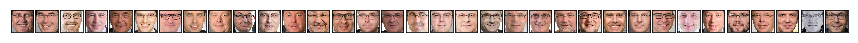

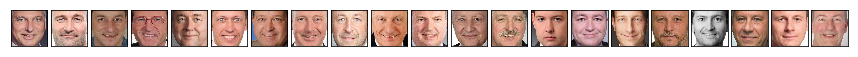

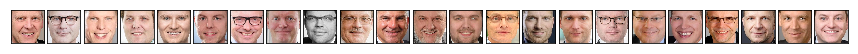

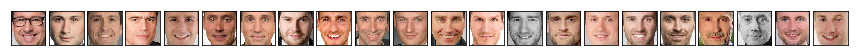

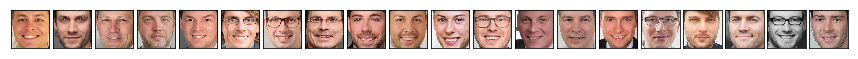

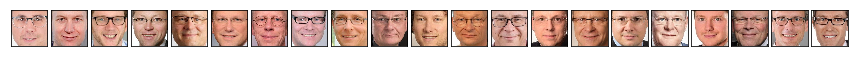

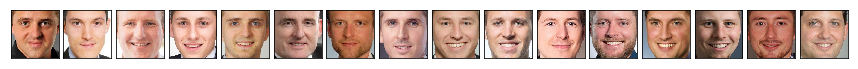

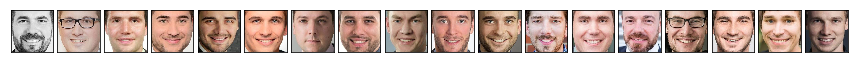

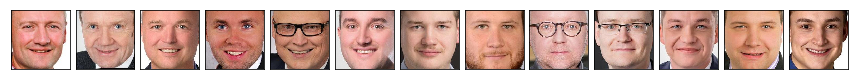

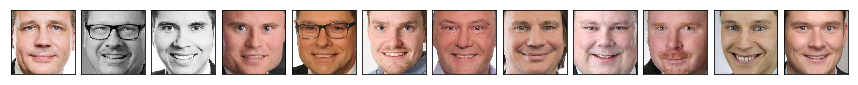

In [29]:
#Plotting Clusters

fig, axes = plt.subplots(1, n_cluster0, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster0[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster1, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster1[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster2, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster2[i], cmap='bone')
    pass

fig, axes = plt.subplots(1, n_cluster3, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster3[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster4, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster4[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster5, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster5[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster6, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster6[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster7, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster7[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster8, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster8[i], cmap='bone')
    pass


fig, axes = plt.subplots(1, n_cluster9, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster9[i], cmap='bone')
    pass

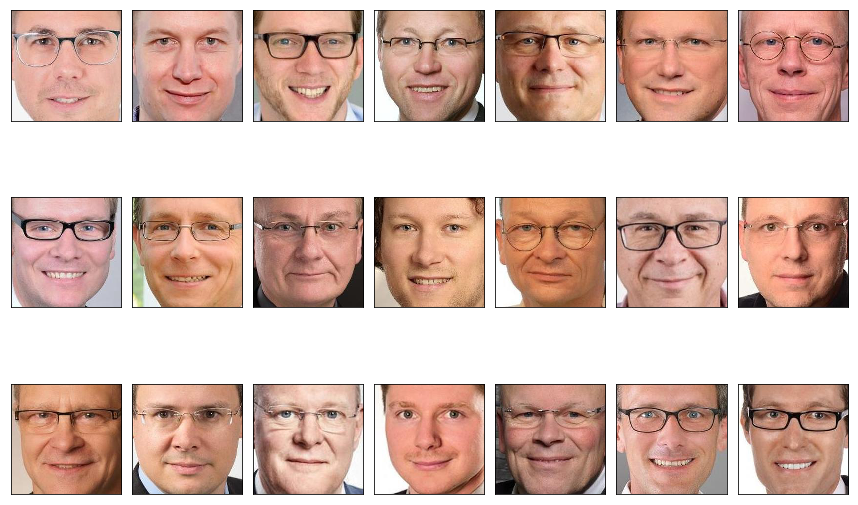

In [31]:
# EXAMPLE CLUSTER 
fig, axes = plt.subplots(3, 7, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster5[i], cmap='bone')
    pass



In [11]:
# # Visualize the results on PCA-reduced data
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import scale

# reduced_data = PCA(n_components=2).fit_transform(embedding)
# kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()